In [ ]:
import math
def _sigmoid(h):
  y=1.0/(1+math.exp(-h))
  return y
def activation(inputs,weights):
  sum=0
  for i,j in zip(inputs,weights):
    sum=sum+i*j
  return _sigmoid(sum)


inputs=[.5,.3,.2]
weights=[.4,.7,.2]
output=activation(inputs,weights)
print(output)
x=3
y=[3,5]
z=5
layers = [x]+y+[z]
print(layers)

0.610639233949222
[3, 3, 5, 5]


In [ ]:
import numpy as np
class MLP:
  def __init__(self,num_inputs=3,num_hidden=[3,5],num_outputs=2):
    self.num_inputs=num_inputs
    self.num_hidden=num_hidden
    self.num_outputs=num_outputs
    layers = [self.num_inputs]+self.num_hidden+[self.num_outputs]
    self.weights=[]
    for i in range(len(layers)-1):
      w=np.random.rand(layers[i],layers[i+1])
      self.weights.append(w)
  def sigmoid(self,h):
    y=1.0/(1+np.exp(-h))
    return y
  def forward_prop(self,input):
    activations=inputs
    for w in self.weights:
      net_inputs=np.dot(activations,w)
      activations= self.sigmoid(net_inputs)
    return activations  

mlp=MLP()
inputx = np.random.rand(mlp.num_inputs)
outputs=mlp.forward_prop(inputx)
print(inputx)
print(outputs)


[0.38774216 0.17060795 0.77661061]
[0.89015033 0.67023922]


In [ ]:
!mkdir tfjsmodel

In [ ]:
!mkdir data

In [ ]:
cd data

/content/data


In [ ]:
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/aircraft%20carrier.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/airplane.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ambulance.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bulldozer.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bus.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/canoe.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/car.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cruise%20ship.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/firetruck.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/flying%20saucer.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/helicopter.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/hot%20air%20balloon.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pickup%20truck.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sailboat.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/speedboat.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/train.npy


--2021-05-04 10:51:20--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/aircraft%20carrier.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.240, 172.253.62.128, 172.217.7.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91339216 (87M) [application/octet-stream]
Saving to: ‘aircraft carrier.npy’

aircraft carrier.np 100%[===================>]  87.11M   149MB/s    in 0.6s    

2021-05-04 10:51:21 (149 MB/s) - ‘aircraft carrier.npy’ saved [91339216/91339216]

--2021-05-04 10:51:21--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/airplane.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.240, 142.251.33.208, 172.217.164.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118872512 (

In [ ]:
!ls

'aircraft carrier.npy'	 car.npy	       'pickup truck.npy'
 airplane.npy		'cruise ship.npy'       sailboat.npy
 ambulance.npy		 firetruck.npy	        speedboat.npy
 bulldozer.npy		'flying saucer.npy'     train.npy
 bus.npy		 helicopter.npy
 canoe.npy		'hot air balloon.npy'


In [ ]:
cd ..

/content


In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 112kB 28.5MB/s 
  Found existing installation: tensorflow-hub 0.12.0
    Uninstalling tensorflow-hub-0.12.0:
      Successfully uninstalled tensorflow-hub-0.12.0


In [ ]:
from sklearn.model_selection import train_test_split as tts
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from random import randint
import numpy as np
import os
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import tensorflowjs as tfjs


In [ ]:
N_CLASSES = 16
TRANSPORT = {0: "Aircraft carrier", 1: "Airplane", 2: "Ambulance", 3: "Bulldozer",4: "Bus", 5: "Canoe", 6: "Car", 7: "Cruise ship",8: "Firetruck", 9: "Flying saucer", 10: "Helicopter", 11: "Hot air balloon",12: "Pickup truck", 13: "Sailboat", 14: "Speedboat", 15: "Train"}
print(len(TRANSPORT))
# number of samples to take in each class
N = 10000

# some other constants
N_EPOCHS = 40

# data files in the same order as defined in FRUITS
files = ["aircraft carrier.npy","airplane.npy","ambulance.npy","bulldozer.npy","bus.npy","canoe.npy","car.npy","cruise ship.npy","firetruck.npy","flying saucer.npy","helicopter.npy"	,"hot air balloon.npy","pickup truck.npy","sailboat.npy","speedboat.npy","train.npy"]
print(len(files))


16
16


In [ ]:
def load(dir, reshaped, files):
    "Load .npy or .npz files from disk and return them as numpy arrays. \
    Takes in a list of filenames and returns a list of numpy arrays."

    data = []
    for file in files:
        f = np.load(dir + file)
        if reshaped:
            new_f = []
            for i in range(len(f)):
                x = np.reshape(f[i], (28,28))
                #stacked_img = np.stack((x,)*3, axis=-1)#for 28x28x3
                x = np.expand_dims(x, axis=0)#for 28x28x1
                x = np.reshape(f[i], (28, 28, 3))#for 28x28x1
                new_f.append(stacked_img)
            f = new_f
        data.append(f)
    return data


def normalize(data):
    "Takes a list or a list of lists and returns its normalized form"

    return np.interp(data, [0, 255], [-1, 1])


def denormalize(data):
    "Takes a list or a list of lists and returns its denormalized form"

    return np.interp(data, [-1, 1], [0, 255])


def visualize(array):
    "Visualize a 2D array as an Image"
    array = np.reshape(array, (28,28,3))
    #cv2.resize(array,(100,100))
    cv2_imshow(array)
    #img = Image.fromarray(array)
    #return img


def set_limit(arrays, n):
    "Limit elements from each array up to n elements and return a single list"
    new = []
    for array in arrays:
        i = 0
        for item in array:
            if i == n:
                break
            new.append(item)
            i += 1
    return new


def make_labels(N1, N2):
    "make labels from 0 to N1, each repeated N2 times"
    labels = []
    for i in range(N1):
        labels += [i] * N2
    return labels

In [ ]:
airplanes = load("data/", True, ['airplane.npy'])
print(airplanes[0][0].shape)

(28, 28, 3)


In [ ]:
for i in range(0,10):
  print(airplanes[0][i].shape)
  visualize(airplanes[0][i])
  

(28, 28, 3)


(28, 28, 3)


(28, 28, 3)


(28, 28, 3)


(28, 28, 3)


(28, 28, 3)


(28, 28, 3)


(28, 28, 3)


(28, 28, 3)


(28, 28, 3)


In [ ]:
#second argument is True for reshaping the image to a 28x28 form. A conv net expects this format.
fruits = load("data/", True, files)
 
#second argument is False because we don't need to reshape the image. An MLP net expects this format.
#fruits = load("data/", False, files)


# limit no of samples in each class to N
fruits = set_limit(fruits, N)

# normalize the values
fruits = map(normalize, fruits)
fruits1 = list(fruits)
print(len(fruits1))
# define the labels
labels = make_labels(N_CLASSES, N)
print(len(labels))
# prepare the data
x_train, x_test, y_train, y_test = tts(fruits1, labels, test_size=0.2,stratify=labels)
#x_train,x_validate,y_train,y_validate=tts(x_train,y_train,test_size=0.2,stratify=labels)

# one hot encoding
Y_train = np_utils.to_categorical(y_train, N_CLASSES)
Y_test = np_utils.to_categorical(y_test, N_CLASSES)
#Y_validate = np_utils.to_categorical(y_validate, N_CLASSES)
print(len(x_train),len(Y_train))
print(len(x_test),len(Y_test))
#print(len(x_validate),len(Y_validate))

160000
160000
128000 128000
32000 32000


In [ ]:
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(N_CLASSES, activation='softmax'))
noOfFilters=60
sizeOfFilter=(5,5)
sizeOfFilter2=(3,3)
sizeOfPool=(2,2)
noOfNode=500
# model = Sequential()
# model.add((Conv2D(noOfFilters,sizeOfFilter,input_shape=(28,28,3),activation='relu')))
# model.add((Conv2D(noOfFilters, sizeOfFilter, activation='relu')))
# model.add(MaxPooling2D(pool_size=sizeOfPool))
# model.add((Conv2D(noOfFilters//2, sizeOfFilter2, activation='relu')))
# model.add((Conv2D(noOfFilters//2, sizeOfFilter2, activation='relu')))
# model.add(MaxPooling2D(pool_size=sizeOfPool))
# model.add(Dropout(0.5))
# model.add(Flatten())
# model.add(Dense(noOfNode,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(N_CLASSES,activation='softmax'))
model = Sequential()
inps=(28,28,3)#for 3 channels
inps=(28,28,1)# for 1 channels
model.add(Conv2D(32, (5, 5), input_shape=inps, activation='relu'))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES, activation='softmax'))


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# train
model.fit(np.array(x_train), np.array(Y_train), batch_size=32, epochs=125)

print("Training complete")

print("Evaluating model")
preds = model.predict(np.array(x_test))
print(type(preds))
score = 0
for i in range(len(preds)):
    if np.argmax(preds[i]) == y_test[i]:
        score += 1

print("Accuracy: ", ((score + 0.0) / len(preds)) * 100)


model.save("mobiles1"+ ".h5")
print("Keras:Model saved")

tfjs.converters.save_keras_model(model, '/content/tfjsmodel')

print("Tensorflow.js: Model saved")



Epoch 1/125
4000/4000 [==============================] - 47s 4ms/step - loss: 1.5049 - accuracy: 0.5189
Epoch 2/125
4000/4000 [==============================] - 14s 3ms/step - loss: 0.9601 - accuracy: 0.7059
Epoch 3/125
4000/4000 [==============================] - 14s 3ms/step - loss: 0.9024 - accuracy: 0.7232
Epoch 4/125
4000/4000 [==============================] - 14s 3ms/step - loss: 0.8704 - accuracy: 0.7334
Epoch 5/125
4000/4000 [==============================] - 14s 3ms/step - loss: 0.8514 - accuracy: 0.7384
Epoch 6/125
4000/4000 [==============================] - 14s 3ms/step - loss: 0.8377 - accuracy: 0.7417
Epoch 7/125
4000/4000 [==============================] - 14s 3ms/step - loss: 0.8227 - accuracy: 0.7476
Epoch 8/125
4000/4000 [==============================] - 14s 3ms/step - loss: 0.8151 - accuracy: 0.7485
Epoch 9/125
4000/4000 [==============================] - 14s 4ms/step - loss: 0.7951 - accuracy: 0.7555
Epoch 10/125
4000/4000 [==============================] - 14s 3m

In [ ]:
def bruh(n):
  return np.argmax(n,axis=-1)
print(preds.shape)
preds2 = map(bruh,preds)
preds2=list(preds2)
print(preds2[0:5])
print(len(preds2))
print(y_test[0:5])
print(len(y_test))
from sklearn.metrics import classification_report
target_names = ["aircraft carrier","airplane","ambulance","bulldozer","bus","canoe","car","cruise ship","firetruck","flying saucer","helicopter","hot air balloon","pickup truck","sailboat","speedboat","train"]
print(classification_report(y_test,preds2,target_names))

(32000, 16)
[14, 11, 3, 4, 3]
32000
[7, 11, 3, 4, 3]
32000
                  precision    recall  f1-score   support

aircraft carrier       0.00      0.00      0.00         0
        airplane       0.00      0.00      0.00         0
       ambulance       0.00      0.00      0.00         0
       bulldozer       0.00      0.00      0.00         0
             bus       0.00      0.00      0.00         0
           canoe       0.00      0.00      0.00         0
             car       0.00      0.00      0.00         0
     cruise ship       0.00      0.00      0.00         0
       firetruck       0.00      0.00      0.00         0
   flying saucer       0.00      0.00      0.00         0
      helicopter       0.00      0.00      0.00         0
 hot air balloon       0.00      0.00      0.00         0
    pickup truck       0.00      0.00      0.00         0
        sailboat       0.00      0.00      0.00         0
       speedboat       0.00      0.00      0.00         0
           t

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: Und

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, preds2, average='weighted', labels=np.unique(preds2))

0.7708171669618799

In [ ]:
x= x_test[2]
y=np.expand_dims(x,axis=0)
z=np.argmax(model.predict(y), axis=-1)
label=TRANSPORT[z[0]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


11
<class 'numpy.ndarray'>
(28, 28, 3)
(28, 28, 3)
Bulldozer


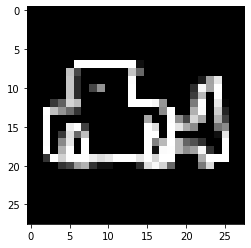

In [ ]:
print(y_test[1])
print(type(x))
print(x.shape)
from matplotlib import pyplot as plt
x = np.reshape(x, (28,28,3)) # for 3 channels
x = np.reshape(x, (28,28)) #for 1 channel
print(x.shape)
grayscale_array = np.asarray(x)
plt.imshow(grayscale_array, cmap="gray")
print(label)